In [306]:
# spotify python api imports
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd

# accessing spotify application through credentials
cid = '5b85a9af539f47da8dcbbcf517e42650'
secret = 'cb3ce73abd464866b285015d631ca1d5'
clientCredentialsManager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager = clientCredentialsManager)

In [307]:
valenceForEmotion = {} # for lasya

# method to access playlist and obtain song data
def accessPlaylist(url, limit, offset):
    # create an empty list and an empty df
    listOfFeatures = ['artist', 'album', 'trackName', 'trackId', 'danceability', 'energy', 'loudness',
                              'valence', 'tempo', 'acousticness']
    playlistDf = pd.DataFrame(columns = listOfFeatures)
    playlist = sp.user_playlist_tracks('', url, limit=limit, offset=offset)["items"]

    # loop through the given playlist and get song features
    for track in playlist:
        # create empty dict
        playlistFeatures = {}
        # get song data
        playlistFeatures['artist'] = track['track']['album']['artists'][0]['name']
        playlistFeatures['album'] = track['track']['album']['name']
        playlistFeatures["trackName"] = track["track"]["name"]
        playlistFeatures["trackId"] = track["track"]["id"]
        playlistFeatures["popularity"] = track["track"]["popularity"]
        playlistFeatures["albumReleaseDate"] = track["track"]["album"]["release_date"]
        audioFeatures = sp.audio_features(playlistFeatures["trackId"])[0]
        
        # get song features
        for feature in listOfFeatures[4:]:
            playlistFeatures[feature] = audioFeatures[feature]
            # DO NOT DELETE - LASYA NEEDS FOR VALENCE ANALYSIS 
            if (feature == "valence"):
                valenceForEmotion[playlistFeatures['trackName']] = audioFeatures["valence"]
        
        trackDf = pd.DataFrame(playlistFeatures, index = [0])
        playlistDf = pd.concat([playlistDf, trackDf], ignore_index = True)
    # TEST --> print(playlistDf.valence[2])
    return playlistDf

In [308]:
# send any public playlist to method
songs = accessPlaylist('https://open.spotify.com/playlist/2U9q9cml8EInaiYFDYwZ73?si=1f188bb952c041c1', 100, 0)

In [309]:
# put song data into table
playlistTable = pd.concat([songs], ignore_index = True)

In [310]:
# determine number of songs in the playlist to display the correct number in the table
numberOfSongs = 1
for trackName in songs:
    numberOfSongs += 1
playlistTable.head(numberOfSongs)

,artist,album,trackName,trackId,danceability,energy,loudness,valence,tempo,acousticness,popularity,albumReleaseDate
0,Various Artists,Happy New Year,India Waale,69EoR3Z8jgRODL3AmQs5ZP,0.720,0.75300,-5.453,0.6190,128.016,0.037800,47.0,2014-09-26
1,The Kid LAROI,F*CK LOVE 3: OVER YOU,STAY (with Justin Bieber),5PjdY0CKGZdEuoNab3yDmX,0.591,0.76400,-5.484,0.4780,169.928,0.038300,93.0,2021-07-23
2,THE ANXIETY,THE ANXIETY,Meet Me At Our Spot,07MDkzWARZaLEdKxo6yArG,0.773,0.47000,-7.930,0.3990,94.995,0.015300,92.0,2020-03-13
3,The Weeknd,After Hours,Blinding Lights,0VjIjW4GlUZAMYd2vXMi3b,0.514,0.73000,-5.934,0.3340,171.005,0.001460,92.0,2020-03-20
4,Dua Lipa,Future Nostalgia,Levitating (feat. DaBaby),5nujrmhLynf4yMoMtj8AQF,0.702,0.82500,-3.787,0.9150,102.977,0.008830,88.0,2020-03-27
5,Drake,Certified Lover Boy,Way 2 Sexy (with Future & Young Thug),0k1WUmIRnG3xU6fvvDVfRG,0.803,0.59700,-6.035,0.3310,136.008,0.000619,93.0,2021-09-03
6,Playboi Carti,Whole Lotta Red,Sky,29TPjc8wxfz4XMn21O7VsZ,0.785,0.90300,-4.184,0.5650,139.980,0.258000,85.0,2020-12-25
7,Ludwig van Beethoven,"Beethoven: Piano Sonatas, Vol.3","Sonata No. 14 ""Moonlight"" in C-Sharp Minor"", O...",3DNRdudZ2SstnDCVKFdXxG,0.184,0.00527,-37.264,0.1510,170.612,0.995000,69.0,2007-09-25
8,Mariah Carey,Merry Christmas,All I Want for Christmas Is You,0bYg9bo50gSsH3LtXe2SQn,0.336,0.62700,-7.463,0.3500,150.273,0.164000,76.0,1994-11-01
9,Céline Dion,Let's Talk About Love,"My Heart Will Go On - Love Theme from ""Titanic""",33LC84JgLvK2KuW43MfaNq,0.428,0.27600,-11.729,0.0382,99.195,0.732000,75.0,1997-10-24


Emotions associated with your music are average, slightly on the sadder side.
Your average valance is 0.48232307692307685


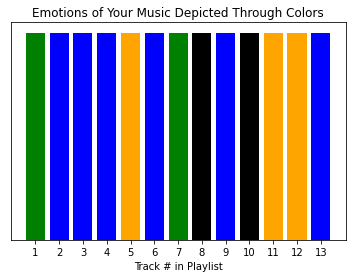

In [311]:
# imports for graphing and spotify api
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
import numpy as np
import spotipy as sp
from termcolor import colored

totalValence = 0.0
count = 0
songsForEmotion = []
graphHeight = []
colorsForEmotion = []

# looping through valence values
for key, value in valenceForEmotion.items():
    totalValence += value
    count += 1
    songsForEmotion.append(count) 
    graphHeight.append(1) # every bar will have same height
    # print("The valence of " + key + " is " + str(value))
    
    # adjusting the color of the bar based on the song's happiness
    if (value < 0.3):
        colorsForEmotion.append("black")
    elif (value < 0.5):
        colorsForEmotion.append("blue")
    elif (value < 0.7):
        colorsForEmotion.append("green")
    else:
        colorsForEmotion.append("orange")

avgValence = totalValence / count

# printing output to the user
if (avgValence < 0.3):
    print(colored("Emotions associated with your music are very sad and gloomy.", 'black'))
    print("Your average valence is " + str(avgValence))
elif (avgValence < 0.5):
    print(colored("Emotions associated with your music are average, slightly on the sadder side.", 'blue'))
    print("Your average valance is " + str(avgValence))
elif (avgValence < 0.7):
    print(colored("Emotions associated with your music are average, slightly on the happier side.", 'green'))
    print("Your average valance is " + str(avgValence))
else:
    print(colored("Emotions associated with your music are very happy and hype.", 'orange'))
    print("Your average valance is " + str(avgValence))
    
# putting data into the graph and displaying it
plt.bar(songsForEmotion, graphHeight, color=colorsForEmotion)
plt.title('Emotions of Your Music Depicted Through Colors')
plt.xlabel('Track # in Playlist')
plt.yticks([])
plt.xticks(np.arange(1, count + 1, 1))
plt.show()

In [312]:
# imports for graphs
import numpy as np
import matplotlib.pyplot as plt

# declaring a method to graph a comparison between two songs
def audioAnalysisGrapher(name1, name2):
    index1 = int(0)
    index2 = int(1)
    count = 0
    # determining what index the song name correlates to
    for index, row in songs.iterrows():
        nameTest = str(row['trackName'])
        if name1 == nameTest:
            index1 = count
        elif name2 == nameTest:
            index2 = count
        count += 1
    
    # obtaining song features
    firstAverages = (songs.valence[index1]*100, songs.danceability[index1]*100, songs.energy[index1]*100, songs.tempo[index1])
    secondAverages = (songs.valence[index2]*100, songs.danceability[index2]*100, songs.energy[index2]*100, songs.tempo[index2])

    # creating plot
    fig, ax = plt.subplots()
    index = np.arange(4)
    barWidth = 0.2
    opacity1 = 0.8
    opacity2 = 0.8

    # changing the color of the bar based on the song's valence
    color1 = 'gray'
    if (songs.valence[index1] < 0.3):
        color1 = 'black'
    elif (songs.valence[index1] < 0.5):
        color1 = 'blue'
    elif (songs.valence[index1] < 0.7):
        color1 = 'green'
    else:
        color1 = 'orange'
       
    # changing the color of the bar based on the song's valence
    color2 = 'white'
    if (songs.valence[index2] < 0.3):
        color2 = 'black'
    elif (songs.valence[index2] < 0.5):
        color2 = 'blue'
    elif (songs.valence[index2] < 0.7):
        color2 = 'green'
    else:
        color2 = 'orange'
    
    # adjusting opacity if both songs represent the same color correlating to valence
    if (color1 == color2):
        opacity1 = 0.9
        opacity2 = 0.5
    
    bars1 = plt.bar(index, firstAverages, barWidth,
    alpha=opacity1,
    color=color1,
    label=name1)
    
    bars2 = plt.bar(index + barWidth, secondAverages, barWidth,
    alpha=opacity2,
    color=color2,
    label=name2)

    plt.xlabel('')
    plt.ylabel('Mean Values')
    plt.title('Audio Analysis Comparison')
    plt.xticks(index + barWidth, ('Valence (x100)', 'Danceability (x100)', 'Energy (x100)', 'Tempo'))
    plt.legend()

    plt.tight_layout()
    plt.show()

What is the first track you would like to analyze? Sky
Which track would you like to compare it to? Despacito - Remix


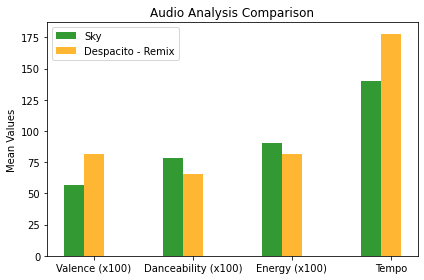

In [313]:
name1 = str(input('What is the first track you would like to analyze? '))
name2 = str(input('Which track would you like to compare it to? '))

audioAnalysisGrapher(name1, name2)